In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import Model
import random

In [2]:
# generate the same random numbers each time
np.random.seed(0)

In [3]:
# load the data sample from mnist library
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [4]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)


In [5]:
# asserting tests for train and test samples. number of samples and dimensions
assert(X_train.shape[0] == Y_train.shape[0]), "The number of train images isn't matched to the labels"
assert(X_test.shape[0] == Y_test.shape[0]), "The number of test images isn't matched to the labels"
assert(X_train.shape[1:] == (28, 28)), "The dimensions of train images aren't 28x28"
assert(X_test.shape[1:] == (28, 28)), "The dimensions of test images aren't 28x28"

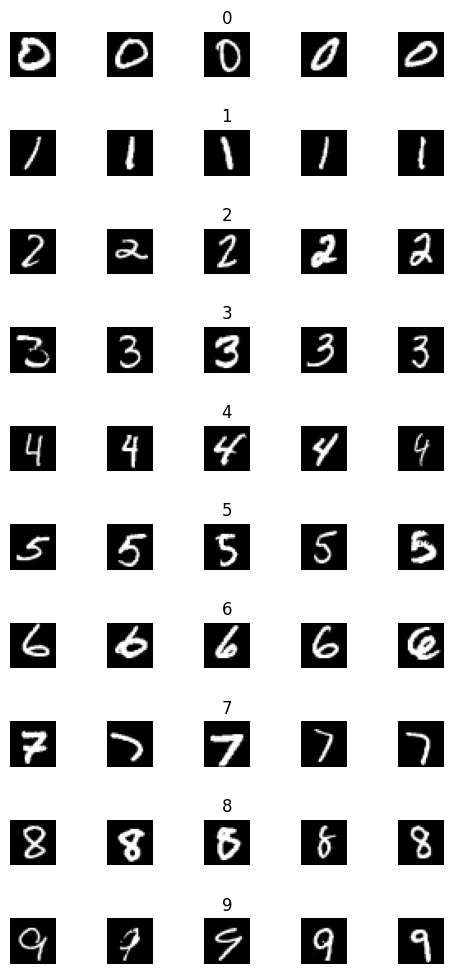

In [6]:
# store the number of each class
num_of_samples = []
# declare cols for the number of columns to display, and number of categories: 0,...,9
cols = 5
num_classes = 10
# declare fig to display a figure for randomly selected samples
# declare axs to access each region of the subplot figure
# create a subplot number of classes x number of columns, each in size 5x10 inches
fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5, 10))
# tighten the figure to omit the conflicts between regions
fig.tight_layout()
# iterate on axis to display randomly selected samples
for i in range(cols):
    for j in range(num_classes):
        # select all desired samples of class j
        x_selected = X_train[Y_train==j]
        # randomly select a sample and show it in the desired axis in gray-scale
        axs[j][i].imshow(x_selected[random.randint(0, len(x_selected)-1), :, :], cmap=plt.get_cmap("gray"))
        # don't show the axis for each region
        axs[j][i].axis("off")
        if i == 2:
            # show the title of the desired class on the middle column
            axs[j][i].set_title(str(j))
            # store the number of desired class
            num_of_samples.append(len(x_selected))

Text(0, 0.5, 'Number of images(samples)')

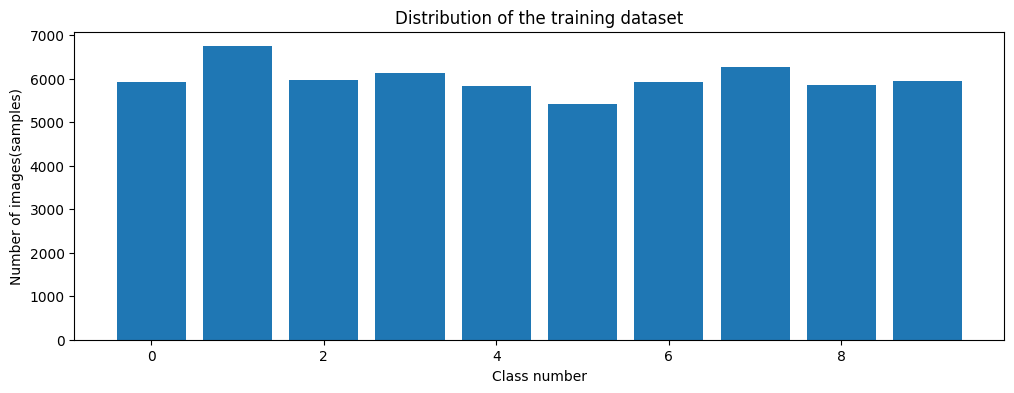

In [7]:
# create a figure to display distribution of classes
plt.figure(figsize=(12, 4))
# create a bar graph, x axis includes the class number and y axis indlude number of images
plt.bar(range(0, num_classes), num_of_samples)
# title the bar graph and its axis
plt.title("Distribution of the training dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images(samples)")

In [8]:
# convert the samples into convolutional desired
pixels_dim = 28
X_train = X_train.reshape(X_train.shape[0], pixels_dim, pixels_dim, 1)
X_test = X_test.reshape(X_test.shape[0], pixels_dim, pixels_dim, 1)
# output the new shapes
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [9]:
# one hot encode labels
Y_train = to_categorical(Y_train, 10)
Y_test = to_categorical(Y_test, 10)

In [10]:
# normalize the samples. each pixel is some number between 0 and 255 due to the gray scal
# therefore, we have to put them in range [0, 1] to normalize them
X_train = X_train / 255
X_test = X_test / 255

In [11]:
# define the LeNet model function
def leNet_model():
    # choose the model
    model = Sequential()
    # add the first conv layer
    # 30 filters(features), filter size 5x5, input shape is the shape of samples, activation function relu
    # strides is the pixels that we take as a step, padding is used for keeping the size of the images, but we don't use it here as hand-written images are center-wised and borderd aren't much important
    model.add(Conv2D(30, (5, 5), input_shape=(28, 28, 1), activation='relu', strides=1, padding='valid'))
    # add the first pooling layer with pool size 2x2
    model.add(MaxPool2D(pool_size=(2, 2)))
    # add the second conv layer with fewer features to compromise computational power
    model.add(Conv2D(15, (3, 3), activation='relu'))
    # add the second pooling layer
    model.add(MaxPool2D(pool_size=(2, 2)))
    # flatten the data we achieved in the process of conv and pooling in order to use in fully connected layer
    model.add(Flatten())
    # add the first fully connected layer with 500 neurons and activation function relu
    model.add(Dense(500, activation='relu'))
    # add the dropout layer to generalize and improve the accuracy with rate 0.5
    model.add(Dropout(0.5))
    # add the output layer which is another fully connected layer with neurons as many as the classes and activation function softmax
    model.add(Dense(num_classes, activation='softmax'))
    # compile the model using Adam algorithm with learning rate 0.01, error function categorical cross entropy and keeping the process of accuracy
    model.compile(Adam(0.01), loss='categorical_crossentropy', metrics=['accuracy'])
    # return the LeNet model
    return model

In [12]:
# declare the model
model = leNet_model()
# output a summary of the model
print(model.summary())

c:\Users\OstadeKachal\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 24, 24, 30)     │           780 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 30)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 10, 10, 15)     │         4,065 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 15)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 375)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 500)            │       188,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 197,855 (772.87 KB)

 Trainable params: 197,855 (772.87 KB)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
# fit the model to the samples and labels, choose 10% of the dataset for validation test, 10 epochs, batch size 400, show progress bar, shuffle true and store the process in h
h = model.fit(X_train, Y_train, epochs=10, validation_split=0.1, batch_size=400, verbose=1, shuffle=1)

Text(0.5, 0, 'epoch')

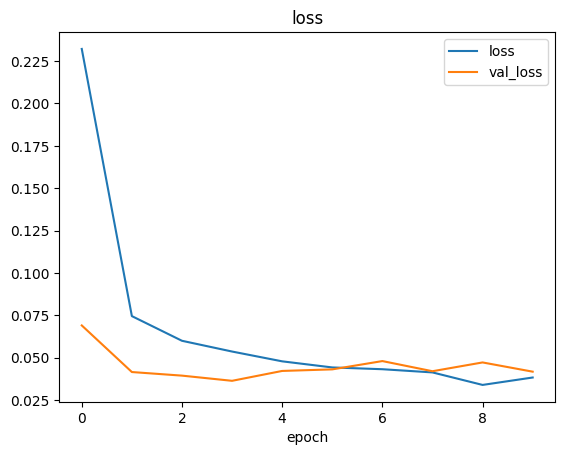

In [14]:
# plot the process of loss of train test and validation test
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

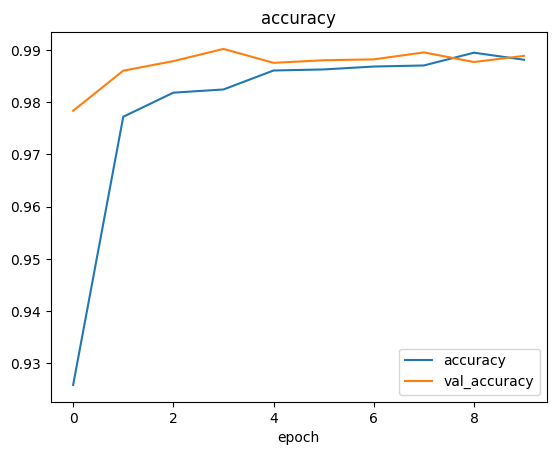

In [15]:
# plot the process of accuaracy of train test and validation test
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.title('accuracy')
plt.xlabel('epoch')

In [16]:
# evaluate the model on the test samples, don't show the progress bar
score = model.evaluate(X_test, Y_test, verbose=0)
# output the loss(score) and accuracy of the trained model
print(f'Test score: {score[0]}')
print(f'Test accuracy: {score[1]}')

Test score: 0.03729373216629028
Test accuracy: 0.9894999861717224


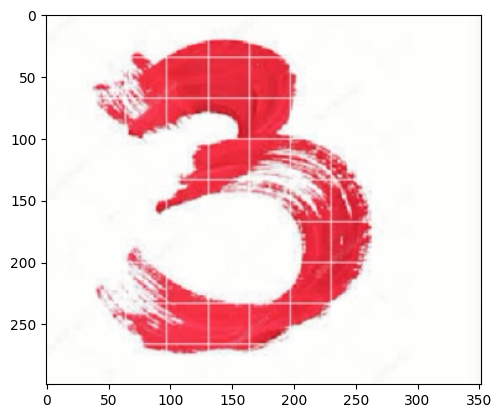

In [17]:
from PIL import Image

# declare the img to store the hand-written image for test
img = Image.open('Handwritten-digit.png')
# show the image in a plot
plt.imshow(img)

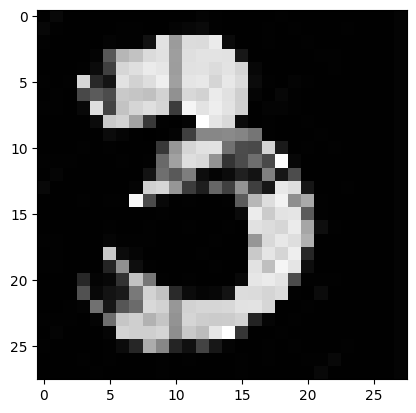

In [18]:
import cv2

# convert the image into numpy array
img_array = np.asarray(img)
# resize the image into 28x28, that is the initial size of our data samples
resized_img = cv2.resize(img_array, (28, 28))
# convert the image into gray-scale so that the shape would be compatible
# before conversion, the shape is (28, 28, 4) due to RGB and alpha values
gray_scale_img = cv2.cvtColor(resized_img, cv2.COLOR_RGB2GRAY)
# the initial image is black with white background, but our dataset is otherwise. therefore, we reverse the color of the digit and the background using logical not
final_img = cv2.bitwise_not(gray_scale_img)
# plot the image in gray-scale color map
plt.imshow(final_img, cmap=plt.get_cmap('gray'))
# print(final_img)

In [19]:
# normalize the image
final_img = final_img / 255
# flatten the image
final_img = final_img.reshape(1, 28, 28, 1)

In [20]:
# predict multiclass model using final_img
predict_function = model.predict(final_img)
# declare multiclass predict function to store classes distinctively
multiclass_pred_func = np.argmax(predict_function, axis=1)
# print the prediction of our model
print(f"Predicted digit: {str(multiclass_pred_func)}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
Predicted digit: [3]


In [21]:
# display what convolutional network actually sees(in convolutional layers), find the indexes from model summary
layer1 = Model(inputs=model.layers[0].input, outputs=model.layers[0].output)
layer2 = Model(inputs=model.layers[0].input, outputs=model.layers[2].output)
# predict the image and store it to access some data
visual_layer1, visual_layer2 = layer1.predict(final_img), layer2.predict(final_img)
# output the shapes of conv layers output
print(visual_layer1.shape)
print(visual_layer2.shape)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
(1, 24, 24, 30)
(1, 10, 10, 15)


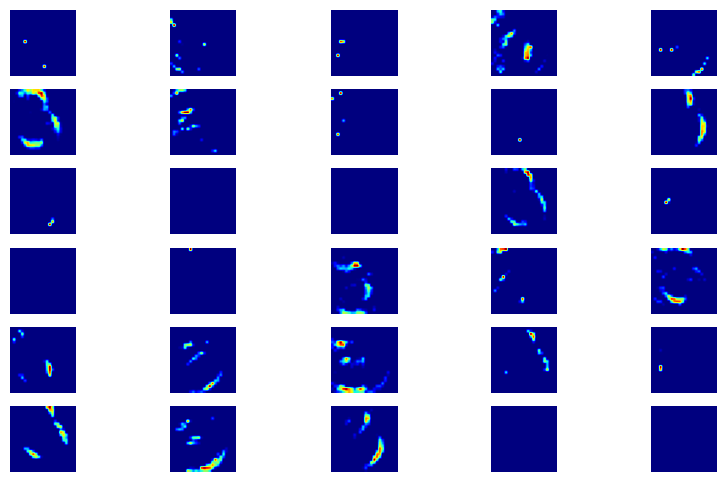

In [22]:
# create a figure in size 10x6 to display the features of the first conv layer
plt.figure(figsize=(10, 6))
# iterate on features
for i in range(30):
    # index the subplot for the current feature
    plt.subplot(6, 5, i+1)
    # put the image in the desired subplot with color map jet to highlight the differences
    plt.imshow(visual_layer1[0, :, :, i], cmap=plt.get_cmap('jet'))
    # remove the axis off the plot
    plt.axis('off')

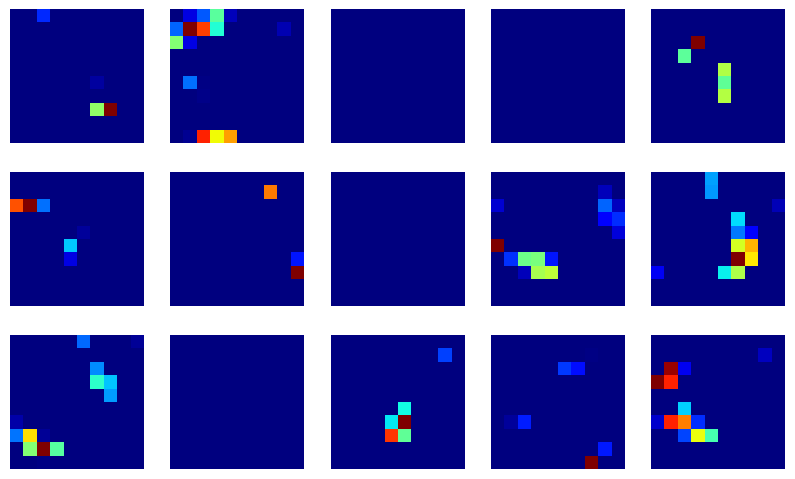

In [23]:
# create a figure in size 10x6 to display the features of the second conv layer
plt.figure(figsize=(10, 6))
# iterate on features
for i in range(15):
    # index the subplot for the current feature
    plt.subplot(3, 5, i+1)
    # put the image in the desired subplot with color map jet to highlight the differences
    plt.imshow(visual_layer2[0, :, :, i], cmap=plt.get_cmap('jet'))
    # remove the axis off the plot
    plt.axis('off')